<h1>Machine Learning Regressions Analysis</h1>

***

<img src="jhu_wse.png" width = "375" style="float:right">
Zachary Senft <br>
May 11, 2021<br>

This Jupyter notebook contains a report analyzing a Linear and Lasso regression algorithm.<br>
This report dives into the algorithm, coding, and theoretical & empirical analysis of the method.
<br>
<h2> Table of Contents </h2>

1.0 Algorithm Description<br>
2.0 Algorithm Code<br>
> 2.1 Linear Regression Code<br>
  2.2 LASSO Regression Code<br>
  
3.0 Performance measures (analytical and empirical)<br>
4.0 Empirical Evaluation<br>
5.0 Conclusion<br>

***

<h2>1.0 Algorithm Description </h2>

<h3>Introduction</h3>
<br>

Linear and LASSO regressions are functions whose outcome is to model an input data set. They can be applied in various purposes, some use them to model past data while others use them to predict what the future data will look like. This is very useful to study and apply in any industry that would benefit from understanding their data better, understanding the trajectory of their data, and more. These functions operate by calculating a relationship between variables input into the function, and can be applied to datasets with many variables as well. Both linear and LASSO regressions are comprised of two main components, a cost function and a gradient descent function. These predictive modeling, machine learning algorithms can be implemented in arrays, which is what I have done in this report.

The Linear regression is a common type of regression used to fit data that is linear in shape. It can often be confused with what is taught in early school days of fitting data based on a "line of best fit" and is a much more computation-heavy algorithm that produces good results and can back itself up. The reason being is that a linear regression analyses a dataset from starting point zero. It repeatedly improves itself by minimizing its own cost function, and adjusts itself via a gradient descent function. These functions will be expanded upon in the next section. 

The LASSO regression is a similar type of regression that can be used on linear appearing data. It is called a LASSO regression because it utilizes various other factors to minimize the overfitting of data that can happen in other regression models. It is a "least absolute shrinkage and selection operator" regression. It too can be applied to model the past, or predict what the future data will look like. The main difference between the LASSO regression and a simple linear regression, is their cost functions. 

Both regression models aim to find the best fitting equation for a data set by minimizing their cost function as much as possible, or to the programmer's specifications. The lower the cost, the closer the regression line is to each data point.

<h3>How They Work</h3>
<br>

Each algorithm works by minimizing their respective cost function. For a linear regression, the cost function is a calculation of the mean squared error (MSE), whose equation is shown below. <br>
<img src="mse.png" width="200px" style="float:left">
<br><br><br><br><br>
Essentially what MSE does is compare the predicted values to the actual values, and comes up with a number that tells us how accurate it was. It does take into consideration the amount of values in the dataset as well, but that is not critical to the calculation since that will not change iteration to iteration. If the cost function returns a low value, that means the predicted values were on average closer to the actual values. If the cost function returns a higher value, that means the predicted values were on average not as close to the actual values of the data set. This is crucial because the algorithm will calculate the cost function, and then try to improve that value by recalculating the slope and intercept via the gradient descent function in order to minimize the cost function to programmer specifications.
<br><br>
The LASSO regression has a similar cost function to that of a linear regression, except with an added term in an attempt to reduce the likelihood of overfitting the data. The added term is a shrinkage value (lambda) multiplied by the absolute value of the sum of the squared weights at that point. The equation for which is shown below.<br>
<img src="lassocost.png" width="400px" style="float:left">
<br><br><br><br><br>
The gradient descent function is where these regressions really earn their pay. What happens in a gradient descent function is the calculated slope and intercept for a line that was fit to the data is evaluated and improved upon via optimization of the corresponding cost function. This is to say that each iteration of a gradient descent, the sum of the distances from the linear model to the actual data is decreased and therefore making the model more accurate. Details of the inner-workings of the function can be found in the code.

Note that this is open to suggestions on how to improve too.


<h3>Theoretical Complexity</h3><br>
Theoretical complexity here is a difficult question, because technically it depends for each regressional model how many iterations it takes more the model to converge into a final state as specified by the programmer. However, we can take the theoretical complexity of each cost function and the theoretical complexity of gradient descent to arrive at an answer. 
<br><br>
The linear regression cost function consists of an iterative loop of O(1) value transactions, yielding an overall complexity of O(n). The LASSO regression cost function is the same since it is simply adding an extra term and operation that are both constant time operations, it's complexity remains O(n).
<br><br>
The gradient descent functions are the same complexity for each regression type, and consist of a series of constant time operations and an O(n), yielding an overall complexity of O(n).
<br><br>
When you combine the the cost function with the gradient descent for each regression, you will get a complexity of O(n^2), but need to consider the wide range of possibility for the number of iterations based on the programmers specification, and therefore I will add a k-term corresponding with number of overall function calls. 
<br><br>
The theoretical complexity of linear and LASSO regressions are O(kn^2), with the only difference being LASSO having slightly more constant time operations and will exhibit slightly longer computation times for a range of n.
<br><br>
<h3>Quick Note</h3><br>
This Algorithm took me a lot of time to understand, learn, digest, and implement. I really did learn to find this solution, rather than finding it online, which made the experience that much more valuable.

***

<h1>2.0 Algorithm Code</h1>

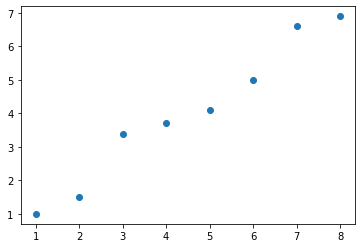

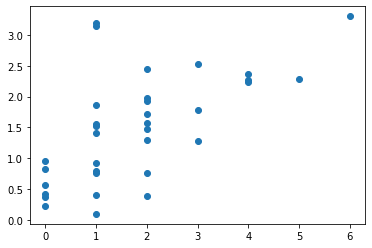

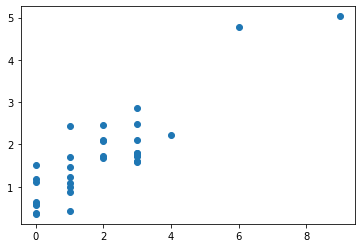

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Laptop cannot handle larger data sets
#Algorithm cannot handle larger data sets not within a range of 0-10 or cost function goes negative

#Simple data set of good correlation, to start with simple understanding
x = [1,2,3,4,5,6,7,8]
y = [1, 1.5, 3.4, 3.7,4.1,5.0,6.6,6.9]

#Tottenham Dataset, understat.com, moderately complex (34 pieces of data)
spursXG = [0.82, 2.28, 3.19, 3.30, 1.78, 0.80, 1.97, 1.87, 0.76, 0.23, 0.39, 1.41, 1.52, 0.95, 0.41, 2.53, 3.14, 1.28, 0.10, 0.37, 0.57, 1.93, 0.42, 0.77, 2.36, 1.55, 2.24, 1.57, 1.72, 2.44, 0.92, 1.48, 1.29, 2.26]
spursGoals = [0, 5, 1, 6, 3, 1, 2, 1, 2, 0, 2, 1, 1, 0, 1, 3, 1, 3, 1, 0, 0, 2, 0, 1, 4, 1, 4, 2, 2, 2, 1, 2, 2, 4]

manuXG = [1.10, 1.58, 0.87, 2.22, 0.65, 0.39, 1.60, 2.43, 2.48, 1.79, 0.59, 1.79, 4.78, 2.08, 1.48, 2.46, 1.24, 1.19, 1.68, 0.99, 1.51, 5.03, 1.72, 0.42, 1.73, 0.36, 0.58, 2.11, 1.70, 1.73, 2.10, 2.87, 1.12]
manuGoals =[1, 3, 1, 4, 0, 0, 3, 1, 3, 3, 0, 3, 6, 2, 1, 2, 1, 0, 2, 1, 0, 9, 3, 1, 3, 0, 0, 2, 1, 2, 3, 3, 0]

#brightonXG
#brightonGoals

plt.scatter(x,y)
plt.figure("Spurs Goals vs xG")
plt.scatter(spursGoals, spursXG)
plt.figure("Manchester United Goals vs xG")
plt.scatter(manuGoals, manuXG)


<h2>2.1 Linear Regression Code</h2>

In [32]:
#Overall complexity is O(n) since it consists of doing constant operations for each element, n

#Cost function of Linear Regression is the MSE sum, this code does that calculation.

def cost_function(y, y_vals):
    
    #initialize sum and increment to 0
    dis_sum = 0
    i = 0
    
    #loop through values in y and sum them according to MSE
    for element in y:                                #O(n)
        dis_sum = dis_sum + ((y_vals[i]-y[i])**2)    #O(1)+O(1)+O(1)+O(1) = All constant operations
        i = i + 1                                    #O(1)
        
    #return the actual cost value
    return (dis_sum / len(y))**1/2                   #O(1)

6.585918941533963
4.305470847070263
2.8224065059769403
1.8579023101890129
1.2306336177717188
0.8226809778766558
0.5573584549662265
0.38479505323537055
0.2725580881707621
0.19955540745470562
0.7592516283991881 0.13765593922761482


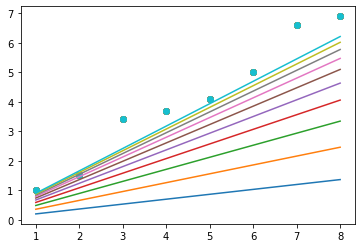

In [33]:
#gradient descent is how the function will move and change to adjust to minimize the cost

def gradient_descent(m, b, x, y):
    
    #learning rate initialized to be slow, and increment initialized
    learning_rate = 0.001
    i = 0
    
    #for each value in x, a guess is made based on the current slope and intercept, then error is calculated for the discrepency
    for element in x:                       #O(n)
        guess = m*x[i] + b                  #O(1) operations 
        error = y[i] - guess                #O(1) operations
    
        #slope and intercept are then adjusted in hopes that future iterations will be more accurate
        m = m + error*x[i]*learning_rate    #O(1) operations
        b = b + error*learning_rate         #O(1) operations
        
        #print(m, b)
        
        #increment i and do it again...
        i = i + 1
    
    #return the value of the slope and intercept
    return m, b
    
m, b = gradient_descent(0, 0, x, y)






#Calculating the values via the slope, intercept.. not really part of the *algorithm*
#This is for the simple data
y2_vals = []
i = 0
for element in x:
    y2_vals.append((x[i]*m) + b)
    i = i + 1

plt.scatter(x,y)
plt.plot(x, y2_vals)

init_cost = 100
new_cost = cost_function(y, y2_vals)
print(new_cost)

while init_cost - new_cost > 0.1:
    init_cost = new_cost
    m, b = gradient_descent(m, b, x, y)
    
    y2_vals = []
    i = 0
    for element in x:
        y2_vals.append((x[i]*m) + b)
        i = i + 1
        
    #plt.figure()
    plt.scatter(x,y)
    plt.plot(x, y2_vals)
    new_cost = cost_function(y, y2_vals)
    print(new_cost)
print(m, b)

2.6911764705882355
1.087436192198292
0.8206947021408545
0.6437545368758797
0.526222150830622
0.44799203222787626
0.36817329365238316 0.17080899857885926


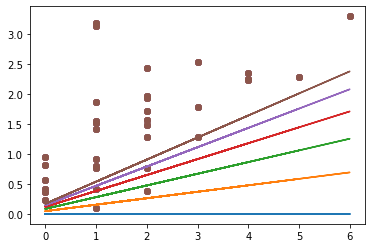

In [34]:
#Tottenham xG one

m = 0
b = 0
spurs_y2_vals = []
i = 0
for element in spursGoals:
    spurs_y2_vals.append((spursGoals[i]*m) + b)
    i = i + 1

plt.scatter(spursGoals,spursXG)
plt.plot(spursGoals, spurs_y2_vals)

init_cost = 100
new_cost = cost_function(spursGoals, spurs_y2_vals)
print(new_cost)

while init_cost - new_cost > 0.1:
    init_cost = new_cost
    m, b = gradient_descent(m, b, spursGoals, spursXG)
    
    spurs_y2_vals = []
    i = 0
    for element in spursGoals:
        spurs_y2_vals.append((spursGoals[i]*m) + b)
        i = i + 1
        
    #plt.figure()
    plt.scatter(spursGoals,spursXG)
    plt.plot(spursGoals, spurs_y2_vals)
    new_cost = cost_function(spursXG, spurs_y2_vals)
    print(new_cost)
print(m, b)

3.6666666666666665
1.261011880057934
0.8255578954423083
0.5681708204092105
0.4156694274738809
0.3249615266059458
0.46386517185489845 0.17657620460787532


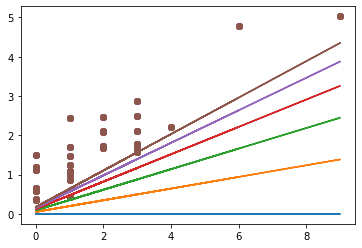

In [54]:
#Manchester United xG one

m = 0
b = 0
manu_y2_vals = []
i = 0
for element in manuGoals:
    manu_y2_vals.append((manuGoals[i]*m) + b)
    i = i + 1

plt.scatter(manuGoals,manuXG)
plt.plot(manuGoals, manu_y2_vals)

init_cost = 100
new_cost = cost_function(manuGoals, manu_y2_vals)
print(new_cost)

while init_cost - new_cost > 0.1:
    init_cost = new_cost
    m, b = gradient_descent(m, b, manuGoals, manuXG)
    
    manu_y2_vals = []
    i = 0
    for element in manuGoals:
        manu_y2_vals.append((manuGoals[i]*m) + b)
        i = i + 1
        
    #plt.figure()
    plt.scatter(manuGoals,manuXG)
    plt.plot(manuGoals, manu_y2_vals)
    new_cost = cost_function(manuXG, manu_y2_vals)
    print(new_cost)
print(m, b)

<h2>2.2 LASSO Regression Code</h2>

In [56]:
#Overall complexity is O(n) since it consists of doing constant operations for each element, n

#Cost function of Lasso Regression is the MSE sum plus an extra term, this code does that calculation.

def lasso_cost(y, y_vals, l1):
    
    #initializing sum and increment
    dis_sum = 0
    i = 0
    
    #looping through y and calculating the cost of each, summing them together
    for element in y:                               #O(n)
        dis_sum = dis_sum + ((y_vals[i]-y[i])**2)   #Many O(1) operations
        i = i + 1                                   
        
    #return the entire cost value
    return (dis_sum / len(y))**1/2 + l1*np.abs(dis_sum) #O(1) operations

6.585918941533963
4.994346182601506
3.273991546933251
2.155166679819255
1.4275349966151938
0.9543099343369208
0.6465358077608228
0.44636226175302984
0.31616738227808405
0.23148427264745852


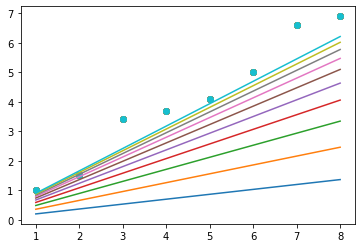

In [57]:
#lasso gradient descent adjusts the function trying to minimize the cost function with the inputs of slope and intercept


def lasso_gradient_descent(m, b, x, y):
    
    #relatively slow learning rate initialized and increment initialized
    learning_rate = 0.001
    i = 0
    
    #every element in x is approximated via the current slope and intercept, error calculated and function is adjusted
    for element in x:           #O(n)
        guess = m*x[i] + b      #O(1)
        error = y[i] - guess    #O(1)
    
        m = m + error*x[i]*learning_rate   #O(1)
        b = b + error*learning_rate        #O(1)
        
        #print(m, b)
        
        i = i + 1   #O(1)
    
    #return the slope and intercept for the next try until pre-conditions are met
    return m, b
    
m, b = lasso_gradient_descent(0, 0, x, y)




y2_vals = []
i = 0
for element in x:
    y2_vals.append((x[i]*m) + b)
    i = i + 1

plt.scatter(x,y)
plt.plot(x, y2_vals)

init_cost = 100
new_cost = cost_function(y, y2_vals)
print(new_cost)

while init_cost - new_cost > 0.1:
    init_cost = new_cost
    m, b = gradient_descent(m, b, x, y)
    
    y2_vals = []
    i = 0
    for element in x:
        y2_vals.append((x[i]*m) + b)
        i = i + 1
        
    #plt.figure()
    plt.scatter(x,y)
    plt.plot(x, y2_vals)
    new_cost = lasso_cost(y, y2_vals, .01)
    print(new_cost)

20.991176470588236
1.087436192198292
0.8206947021408545
0.6437545368758797
0.526222150830622
0.44799203222787626
0.36817329365238316 0.17080899857885926


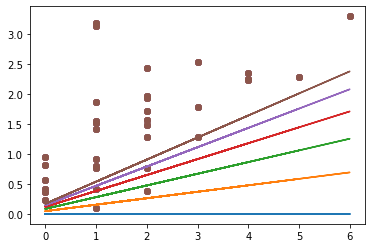

In [58]:
#Tottenham xG one

m = 0
b = 0
spurs_y2_vals = []
i = 0
for element in spursGoals:
    spurs_y2_vals.append((spursGoals[i]*m) + b)
    i = i + 1

plt.scatter(spursGoals,spursXG)
plt.plot(spursGoals, spurs_y2_vals)

init_cost = 100
new_cost = lasso_cost(spursGoals, spurs_y2_vals, 0.1)
print(new_cost)

while init_cost - new_cost > 0.1:
    init_cost = new_cost
    m, b = lasso_gradient_descent(m, b, spursGoals, spursXG)
    
    spurs_y2_vals = []
    i = 0
    for element in spursGoals:
        spurs_y2_vals.append((spursGoals[i]*m) + b)
        i = i + 1
        
    #plt.figure()
    plt.scatter(spursGoals,spursXG)
    plt.plot(spursGoals, spurs_y2_vals)
    new_cost = cost_function(spursXG, spurs_y2_vals)
    print(new_cost)
print(m, b)

27.86666666666667
1.261011880057934
0.8255578954423083
0.5681708204092105
0.4156694274738809
0.3249615266059458
0.46386517185489845 0.17657620460787532


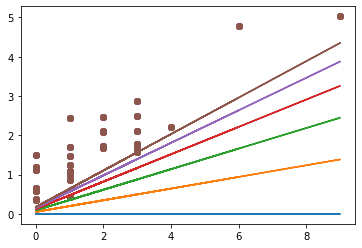

In [60]:
#Manchester United xG one

m = 0
b = 0
manu_y2_vals = []
i = 0
for element in manuGoals:
    manu_y2_vals.append((manuGoals[i]*m) + b)
    i = i + 1

plt.scatter(manuGoals,manuXG)
plt.plot(manuGoals, manu_y2_vals)

init_cost = 100
new_cost = lasso_cost(manuGoals, manu_y2_vals, 0.1)
print(new_cost)

while init_cost - new_cost > 0.1:
    init_cost = new_cost
    m, b = lasso_gradient_descent(m, b, manuGoals, manuXG)
    
    manu_y2_vals = []
    i = 0
    for element in manuGoals:
        manu_y2_vals.append((manuGoals[i]*m) + b)
        i = i + 1
        
    #plt.figure()
    plt.scatter(manuGoals,manuXG)
    plt.plot(manuGoals, manu_y2_vals)
    new_cost = cost_function(manuXG, manu_y2_vals)
    print(new_cost)
print(m, b)

***

<h1>3.0 Performance Measures</h1>
<br>For the defined Linear and Lasso regressions, their performance can be evaluated both analytically and empirically with the outcomes that they produce. <br>

<h2>Theoretical Analysis</h2><br><br>
The linear regression cost function consists of an iterative loop of O(1) value transactions, yielding an overall complexity of O(n). The LASSO regression cost function is the same since it is simply adding an extra term and operation that are both constant time operations, it's complexity remains O(n).
<br><br>
The gradient descent functions are the same complexity for each regression type, and consist of a series of constant time operations and an O(n), yielding an overall complexity of O(n).
<br><br>
When you combine the the cost function with the gradient descent for each regression, you will get a complexity of O(n^2), but need to consider the wide range of possibility for the number of iterations based on the programmers specification, and therefore I will add a k-term corresponding with number of overall function calls. 
<br><br>
The theoretical complexity of linear and LASSO regressions are O(kn^2), with the only difference being LASSO having slightly more constant time operations and will exhibit slightly longer computation times for a range of n.

<br>
<h2>Empirical Analysis</h2><br>
Empirical analysis can take advantage of the few performance metrics that are easily available from the datasets. The measures that will be useful are the rate of decrease of the cost function, and the number of times the algorithm must be called in order to achieve the desired cost function difference. This is relevant since all of the input datasets have been based on the same performance metrics of learning rate and cost differential.


<h1>4.0 Empirical Evaluation</h1><br>

<br>

The empirical data is very telling in proving that these algorithms are very similar. After all, the difference between them is one shrinkage term that makes a slight difference. In the spurs data, it is very clear how much quicker the Lasso algorithm can adjust from higher cost and do it in the same amount or less iterations. My laptop is unable to process larger amounts of data without crashing, yet the trend seen from the canonical data to a non-simple dataset of the cost function is undeniable. Taking a greater perspective of the data, though, it must be noted that they are extremely close to one another in terms of shrinking the cost function and output very similar results. Due to this, I cannot say one is empirically better than another, however I would suggest adding a shrinkage term because it will help with larger datasets as we see slightly here.<br><br>

It is also of note that each dataset processed by the algorithms require the same amount of iterations to achieve the designated level of accuracy. The simple dataset takes 10 iterations for both linear and lasso regressions, while the spurs and manu datasets require 6 iterations each, for each algorithm. This leaves us no choice but to conclude that one term does not provide a significant advantage over the other in terms of quickness of approximation. The results for the slope and intercept do vary slightly, so accuracy can be considered, but overall the slope is also within 0.02 for each dataset, for both the linear and lasso regression. This is to say that if one is better and more accurate than the other, it is not by much. <br><br>

In the graphs below, we can compare the time it takes the functions in terms of iterations and in terms of size of the change. The Lasso regression is in orange and Linear regression in blue. We see for both datasets that after being initialized for the first run, they are virtually the same and produce the same results in the same amount of time.<br><br>

Below these graphs is an additional figure of an O(N) versus O(N^2) algorithm. It must be noted that both of these algorithms are O(N^2) and are reliable. Seeing the drastic difference in complexity between these algorithms and other algorithms that can accomplish linear approximation in O(1) or O(N), I believe it must be argued that these algorithms may not be worth their cost.

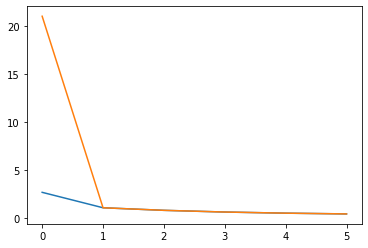

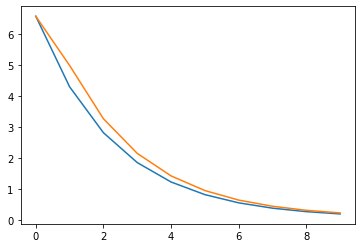

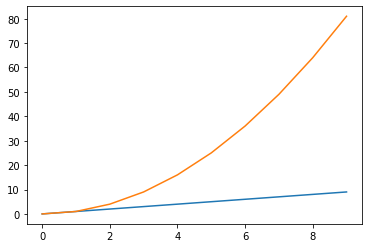

In [33]:
lineary = [2.6911764705882355, 1.087436192198292, 0.8206947021408545, 0.6437545368758797, 0.526222150830622, 0.44799203222787626]
tx = [0, 1, 2, 3, 4, 5]
lassoy = [20.991176470588236, 1.087436192198292, 0.8206947021408545, 0.6437545368758797, 0.526222150830622, 0.44799203222787626]
lineary1 = [6.585918941533963, 4.305470847070263, 2.8224065059769403, 1.8579023101890129, 1.2306336177717188, 0.8226809778766558, 0.5573584549662265, 0.38479505323537055, 0.2725580881707621, 0.19955540745470562]
lassoy1 = [6.585918941533963, 4.994346182601506, 3.273991546933251, 2.155166679819255, 1.4275349966151938, 0.9543099343369208, 0.6465358077608228, 0.44636226175302984, 0.31616738227808405, 0.23148427264745852]
gx = [0,1,2,3,4,5,6,7,8,9]
n2 = [0,1,4,9,16,25,36,49,64,81]

plt.plot(tx, lineary)
plt.plot(tx, lassoy)

plt.figure("Second One")
plt.plot(gx, lineary1)
plt.plot(gx, lassoy1)

plt.figure("Complexity Comparison")
plt.plot(gx, gx)
plt.plot(gx, n2)



<h2>Conclusion</h2><br>
The Linear and Lasso regressions are very useful and clever machine-learning algorithms that can be used to quickly fit a dataset. As previously discussed, the main advantages of these algorithms are their ability to quickly fit a dataset, but require a complexity of O(N^2). My empirical evaluation leads me to conclude that one algorithm is not better than the other in every situation, it will vary based on the data complexity as well as the correlation it has with a line. The more "linear" a dataset is, the less time and iterations it will take for a linear or lasso regression to reduce its cost function and give an ideal solution. <br><br>

I would encourage the use of a Lasso regression because the additional shrinkage term helped my more complex dataset in terms of its quickness of adjusting. However additional readings I have done on the subject suggest that the less linear a dataset is, the greater the effect a shrinkage term has on the outcome of the regression [1]. This corresponds well with my findings, and is why I would urge readers to use a Lasso regression over a Linear regression when applicable. Although it must be noted that all in all the two algorithms performed very similarly, yet the lasso slightly outperformed the linear.<br><br>

I would like to thank Prof. Guven as well as my colleagues for assistance in this project. I truly learned a lot through the struggles and triumphs of it, and am a better computer scientist for it. I look forward to continuing my studies of algorithms in future coursework, as well as applying it to the best of my abilities in my workplace.

<h1>References</h1><br><br>

[1] Zhang, Grace. "The Classical Linear Regression Model is Good, Why do we Need Regularization?". medium.com, (2018): https://medium.com/@zxr.nju/the-classical-linear-regression-model-is-good-why-do-we-need-regularization-c89dba10c8eb#:~:text=Lasso%20performs%20better%20than%20ridge,a%20lot%20with%20feature%20selection.&text=Elastic%20Net%20is%20the%20combination,some%20of%20the%20insignificant%20coefficients. 